## Project 2 -  Polynomial Regression 
### $y = a + b_1x + b_2x^2 + ... + b_nx^n$
### Procedure (from Google Classroom)
* Draw 100 random floating number data set x between [0, 10] with python rand library
* Create your polynomial function for example, set a = 6, b1 = 3.5, and b2 = 2
* Add some noise by y = a + bx + noise, set noise = random number between [0, 10]
* Use python library to build polynomial regression model, find the polynomial regression model's coefficent b and intercept a. Output the R^2 for the percentage of total variance explained by the linear regression model.
*  Discuss the relation of R^2 with data distribution.
---

### Work


First, import the necessary modules for this problem:
* `numpy` for data manipulation
* `scikit-learn` for polynomial regression
* `matplotlib` for plotting data and models 

In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


Draw a data set `x` of 100 random floating point numbers from $[0, 10]$

In [2]:
x = np.random.rand(100) * 10

Create sample data for your linear function in the form $y = a + b_1x + b_2x^2$
* For this example, set $a = 6$, $b_1 = 3.5$, and $b_2 = 2$
* Add noise: $y = a + b_1x + b_2x^2 + \text{noise}$, where noise is equal to a random number from $[0, 10]$

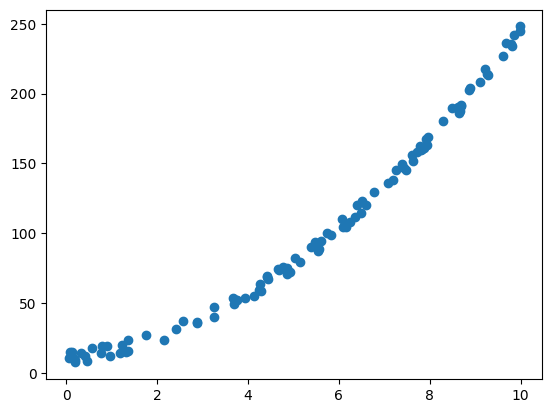

In [3]:
a = 6
b1 = 3.5
b2 = 2
noise = np.random.rand(100) * 10

y = a + b1 * x + b2 * (x ** 2) + noise

# display x and y on a scatterplot:
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

Use `scikit-learn` to build a polynomial regression model.
* Find the polynomial regression model's coefficients $b_1$, $b_2$, and intercept $a$.
* Output the $R^2$ for the percentage of total variance explained by the polynomial regression model.

Predicted a: 10.879511641361619
Predicted b1: 3.4803647548452976
Predicted b2: 2.0088185825364033
y = 10.879511641361619 + 3.4803647548452976x + 2.0088185825364033x^2


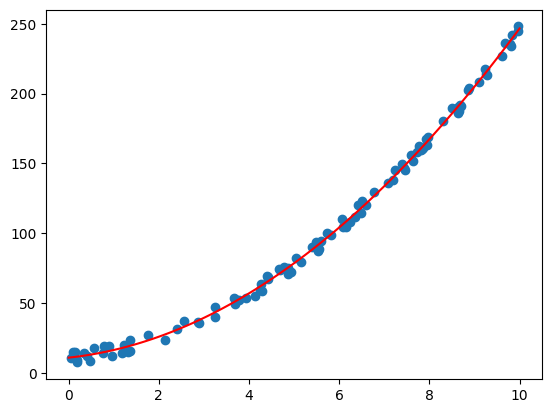

R^2: 0.9982691097714779


In [4]:
poly_model = Pipeline([
  ("poly", PolynomialFeatures(degree=2)), 
  ("linear", LinearRegression(fit_intercept=False))
])
# must reshape x to 1 column since there is only 1 feature:
poly_model = poly_model.fit(x.reshape(-1, 1), y)

# get coefficients b1, b2, and intercept a:
poly_model_a, poly_model_b1, poly_model_b2 = poly_model.named_steps["linear"].coef_

# # display these results and final equation for regression line:
print(f"Predicted a: {poly_model_a}")
print(f"Predicted b1: {poly_model_b1}")
print(f"Predicted b2: {poly_model_b2}")
print(f"y = {poly_model_a} + {poly_model_b1}x + {poly_model_b2}x^2")

# display regression line on scatterplot:
fig, ax = plt.subplots()
ax.scatter(x, y)
x_linspace = np.linspace(0, 10, 100)
y_linspace = (poly_model_a + poly_model_b1 * x_linspace + poly_model_b2 * (x_linspace ** 2))
ax.plot(x_linspace, y_linspace, color="red")
plt.show()

# find and display R^2:
poly_model_r_sq = poly_model.score(x.reshape(-1, 1), y)
print(f"R^2: {poly_model_r_sq}")

Discuss the relation of $R^2$ with data distribution by varying the noise range:

At larger amounts of noise in $y$, with a constant range of $x$ values, $R^2$ drastically decreases. In this way, $R^2$ is inversely related to the noise in $y$.